#                    Can We Trust ML IN Stock Market?

# Introduction
The stock market is one of the most well-known infrastructures through which anyone can potentially make a fortune by predicting the future stock prices. There’s just one problem. How to
predict the future of the stock market accurately? Here, we are going to use machine learning to
possibly predict the stock market. In this case, we would focus on the predict of a famous company
APPLE INC.

# Background
Shares of technology giant Apple Inc. (AAPL), which had become the first U.S.-based public
company with a market cap of more than $1 trillion. Apple exerts a major influence on the
performance of leading capitalization-weighted market indexes, index funds, and index-linked ETFs.
Moreover, the S&P Information Technology Sector Index has never outperformed the entire S&P
500 Index (SPX) when Apple has dropped by more than 30%, according to Bank of America Merrill
Lynch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import stocker
from stocker import Stocker

In [3]:
apple = Stocker('AAPL')

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


AAPL Stocker Initialized. Data covers 1980-12-12 00:00:00 to 2018-03-27 00:00:00.


In [4]:
apple_dataset = apple.stock
apple_dataset.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,1980-12-12,0.422706,0.000000
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,1980-12-15,0.400652,-0.001911
2,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0,1980-12-16,0.371246,-0.001764
3,1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0,1980-12-17,0.380362,0.000000
4,1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0,1980-12-18,0.391536,0.000000


## Relationship Between Parameters

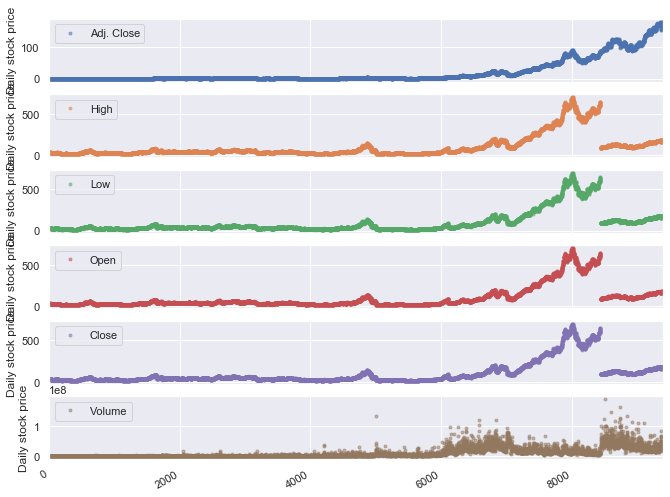

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
cols_plot = ['Adj. Close', 'High','Low','Open','Close','Volume']
axes = apple_dataset[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily stock price')

We can already see some interesting patterns emerge: 1. Fours series “Adj Close, High, Low and
Open” perform in a similar pattern. Therefore, instead of using all four series, Adj Close series is
representive to be used in the data. Hence, we can shrink our data to Date and Adj Close for the
following analysing 2. The series does not exhibit clear seasonality(no pattern repeats again and
again at regular time intervals) Since the data has no seasonality, we assume that an MA model
might not fit the dataset well. The data has a clear trend, so probably a linear regression model
might work
These information are helpul in determining which model to use.

## Insights at Apple

Maximum Adj. Close = 181.72 on 2018-03-12 00:00:00.
Minimum Adj. Close = 0.16 on 1982-07-08 00:00:00.
Current Adj. Close = 168.34 on 2018-03-27 00:00:00.



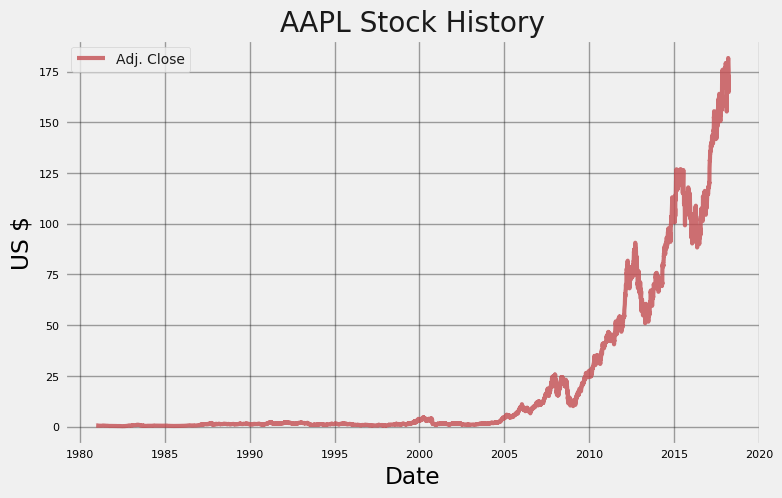

In [6]:
apple.plot_stock()

Incredicle increasing, right?

Let's make an scenario,if my mom bought me 100 shares apple stock at the day I came to the world, that's 1,662$, do you know how much I will earn when I sold it at my 21st birthday , that's 2018 jan 31st?

In [ ]:
apple_dataset[apple_dataset['Date'] == '1997-1-31']

In [ ]:
apple.buy_and_hold(start_date='1997-01-31', end_date='2018-01-31', nshares=100)

</br>
</br>
</br>

Rules: People take advantage of market swings. It should be more shares to be traded when there's large prices fluctuate

Let's figure it out!

In [ ]:
apple.plot_stock(stats = ['Daily Change', 'Adj. Volume'],  plot_type='pct')

The y-axis is in the percentage, because the daily volume is originally in shares, with a range in the hundreds of millions, while daily price change typically is a few dollars! By converting to percentage change we can look at both datasets on a similar scale.

#### So, From this chart we can see there is no relationship between the daily trade volume with daily price change!!!

## Additive Models

In [ ]:
model, model_data = apple.create_prophet_model(days=90)

In [ ]:
apple.evaluate_prediction()

 Result shows that: When the model predicted an increase, the price increased 
 ### 48.59% of the time.
When the model predicted a  decrease, the price decreased  
### 43.66% of the time.


## How Bad It is!! Just as bad as a coin flip!

## Moving Average

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Creating copy of goog_data dataframe for moving averages

df = apple_dataset

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj. Close'], label= 'Close Price History')

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Adj. Close'])

for i in range(0, len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Adj. Close'][i] = data['Adj. Close'][i]
  
# Train-test split

train = new_data[:8800]
test = new_data[0:]

num = test.shape[0]

train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

# Making predictions

pred = []
for i in range(0, num):
  a = train['Adj. Close'][len(train)-924+i:].sum() + sum(pred)
  b = a/num
  pred.append(b)

In [ ]:
test['Predctions']=0
test['Predictions']=pred
plt.plot(train['Adj. Close'])
plt.plot(test[['Adj. Close','Predictions']])

In [ ]:
rms_MA = np.sqrt(np.mean(np.power(np.array(test['Adj. Close'])-np.array(pred),2)))

In [ ]:
rms_MA

#### In terms of figuring out the general trend of the stock data, the moving average method did okay, but it failed to see the full extent of the increase and the up-and-down in price.

## Simple Linear Regression

In [ ]:
#!pip install fastai==1.0.59

In [ ]:
apple_2 = apple_dataset
train = apple_2[:8600]
test = apple_2[8600:]


x_train = train[['High','Low','Open','Close','Volume']]
    

x_test = test[['High','Low','Open','Close','Volume']]
   
y_train = train['Adj. Close']

y_test = test['Adj. Close']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test)
plt.figure(figsize=(16,8))
test['Predictions'] = preds
plt.plot(train['Adj. Close'])#x is the data point at the dataset
plt.plot(test[['Adj. Close','Predictions']])

In [ ]:
rms_LR = np.sqrt(np.mean(np.power(np.array(y_test)-np.array(preds),2)))

In [ ]:
rms_LR

## Multilayer Perceptron

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adam', loss='mean_squared_error')

X_train = np.array(x_train)
Y_train = np.array(y_train)

model.fit(X_train, Y_train, epochs=500)

In [ ]:
predss = model.predict(x_test)

In [ ]:
rms_MP = np.sqrt(np.mean(np.power(np.array(y_test)-np.array(predss),2)))

In [ ]:
rms_MP

In [ ]:
test['Predictions']=0
test['Predictions']=predss
plt.plot(train['Adj. Close'])
plt.plot(test[['Adj. Close','Predictions']])

In [ ]:
all_data = pd.read_csv('sp500_joined_closes.csv')

In [ ]:
all_data.head()

In [ ]:
all_data.loc[1,:].isna().sum()
for i in range(0,len(all_data)):
    
    #print(all_data.loc[i,:].isna().sum())
    if all_data.loc[i,:].isna().sum() > 250:
        print(i)

In [ ]:
all_data.drop(range(7918,7939),inplace = True)
all_data.dropna(axis=1,inplace = True)
year_list = []
for each in all_data.iterrows():
    year = each[1][0]
    year = year[0:4]
    year_list.append(year)
all_data['year'] = year_list
groups = all_data.groupby('year')
avg_price = groups.aggregate(np.mean)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
avg_price

In [ ]:
year =  avg_price.index
avg_price['year'] = year
for i in range(0,(len(avg_price.columns)-1)):
    X = avg_price['year']
    y = avg_price.iloc[:,i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()
    X_train = X_train.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    LR_predictions = lm.predict(X_test)
    
    print(i)
    print(avg_price.columns[i])
    rms_SLR = np.sqrt(np.mean(np.power(np.array(y_test)-np.array(LR_predictions),2)))
    print('RMS = '+ str(rms_SLR))
    print('')

    print(predictions)
    plt.figure(figsize=(16,8))
    plt.plot(predictions,label='Pred')
    plt.plot(y_test,label='real')
    plt.legend()
    plt.title('Prediction VS Real')

# Conclusion: 
In this project, we did some 'exploration' apple stock market using machine learning in. We figure that 
1.  The relationship bewteen the prcies change with volumn changes in a day; no relationship 
2.  The relationship bewteen the close price with other parameters; strongly related
3.  The performance of ML model(linear regression, addtive model, moving average, Multilayer Perceptron) on the stock market prediction; The ups and downs of the many forces at play on share prices have made it impossible to predict, at least for now.There are two types of chaos: level one and level two. Level one chaotic systems are those which don’t react to predictions – the weather for example – and level two are those which do react to predictions, like politics, public protests and, of course, the stock market.If investors want to use ML to do the prediction, we reconmend hold it in the long-term rather than trading frequently.



# Inprovement:
1.  Try out different machine learning algorithms:There are MANY machine learning algorithms out there that are very good. We only used a small subset of them.
2.  We took apple as the example. It can't represent the whole market. When I try to measure the accuracy of the integrated dataset, I only took very small amount of data(1988-2019, 32 columns) 